# Eigenfaces
In this notebook we take a look at a simple and effective method of face recognition and reconstruction. For more information on the methodology, please see these two ([1](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf), [2](https://www.mitpressjournals.org/doi/pdfplus/10.1162/jocn.1991.3.1.71)) papers.

Additionally, the datasets used in this project were kindly made available [here](http://fei.edu.br/~cet/frontalimages_spatiallynormalized_cropped_equalized_part2.zip) and [here](fei.edu.br/~cet/frontalimages_spatiallynormalized_cropped_equalized_part2.zip).

In [1]:
import numpy as np
from PIL import Image
from sklearn.preprocessing import minmax_scale
from scipy.sparse.linalg import eigs
import matplotlib
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
##################################
#Constants (including image files)
##################################
SAMPLES=190
IMAGE_SHAPE= (193,162)
VECTOR_SHAPE=193*162
trainImages = ['./faces/'+str(i)+'a.jpg' for i in range(1,SAMPLES+1)]
bImage = './faces/'+str(1)+'b.jpg'
cImage = './faces/'+str(191)+'a.jpg'
dImage = './faces/'+str(1)+'b.jpg'
eImage = '/Users/jake/Desktop/bike.jpg'
fImage = trainImages[0]
##################################
##################################

#used for tessting
def displayImage(v):
    if not v.shape==IMAGE_SHAPE:
        v = np.reshape(v,IMAGE_SHAPE)
    v = Image.fromarray(v,'L')
    v.show()

#reads in array of 8bit grayscale images, normalized for computational ease
def readImages():
    D = []
    #load data
    for i in range(0,SAMPLES):
        D.append(np.asarray(Image.open(trainImages[i]))/255)
    #data array    
    D = np.array(D)
    #each vector an image..
    D = np.reshape(D,(SAMPLES,VECTOR_SHAPE))
    return D

#run experiment with various number of principle components
def runExp(image,pc,mean):
    w = np.zeros(VECTOR_SHAPE)
    #project into face space
    for i in range(0,SAMPLES):
        w[i] = np.dot(pc[:,i],image)
    
    error = np.zeros(SAMPLES)
    for i in range(0,SAMPLES):
        recon = np.zeros(VECTOR_SHAPE)
        for j in range(i):
            recon += w[j]*pc[:,j]
        error[i] = np.linalg.norm((image-recon))**2
            
    error = (1/VECTOR_SHAPE)*error
    return error,(recon+mean)

In [2]:
Data = readImages()
#mean
mean = np.mean(Data,axis=0)
#shift mean to 0
Data = np.asarray([(d-mean) for d in Data])
#now entries are columns
Data = Data.T

In [3]:
#only get 190 highest eigenals, rest are garbo and they are already sorted properly
cov = np.matmul(Data,Data.T)
eVals,eVecs = eigs(cov,k=190)

In [4]:
#take real parts (Im{} is 0 anyway)
eVecs = eVecs.real
eVals = eVals.real

### Principle Components

We take the eigenpairs from the covariance matrix in order to generate the principle components of our dataset. These eigenvectors provide us with the directions of greatest variance in our dataset.  They describe the data most succinctly and so are referred to as principle components. More info [here](https://en.wikipedia.org/wiki/Principal_component_analysis#).  The eigenvalues give a scalar indicator of how high the variance is in the direction of the corresponding eigenvector.  So, the eigenpairs can be sorted according to their "importance".  Below is a plot of the eigenvalues, which are in the case of the positive definite covariance matrix, also the singular values.  Taking from the work of the papers above, we will refer to the space spanned by these principle components as the *face space*.

Part A


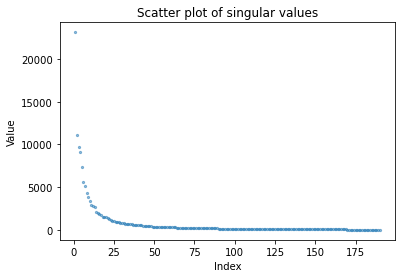

In [5]:
fig = plt.figure(0)
print('Part A')
plt.scatter(range(1,191),eVals,s=5,alpha=.5)
plt.title('Scatter plot of singular values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

Part B results


<Figure size 432x288 with 0 Axes>

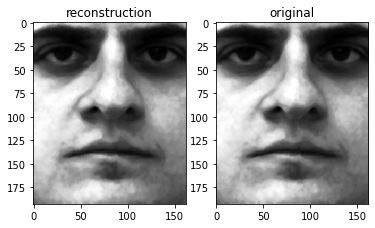

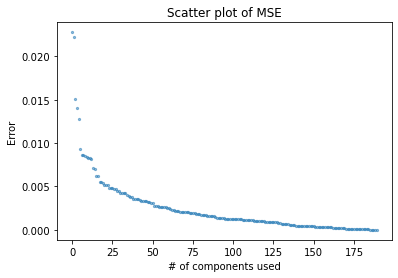

The minimum error attained: 5.2874178692575115e-30.


In [6]:
e = runExp(Data[:,0],eVecs,mean)
error = e[0]
reconstruction = e[1]

print('Part B results')
fig = plt.figure(2)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(np.reshape((reconstruction*255),IMAGE_SHAPE),cmap='gray')
axarr[1].imshow(np.reshape(((Data[:,0]+mean)*255),IMAGE_SHAPE),cmap='gray')
axarr[0].set_title('reconstruction')
axarr[1].set_title('original')
plt.show()

fig = plt.figure(3)
plt.scatter(range(190),error,s=5,alpha=.5)
plt.title('Scatter plot of MSE')
plt.xlabel('# of components used')
plt.ylabel('Error')
plt.show()
print('The minimum error attained: {}.'.format(min(error)))

### *Discussion*
We see that our error is a virtual zero, once we take in to account floating point calculation imprecision.  This is not surprising, as this image was one of those used to generate our eigenfaces and so has a full implicit representation in the face space.

Part C results


<Figure size 432x288 with 0 Axes>

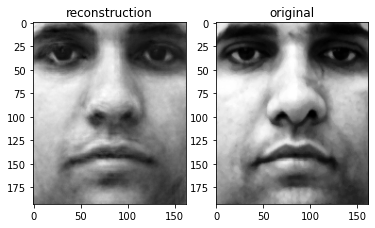

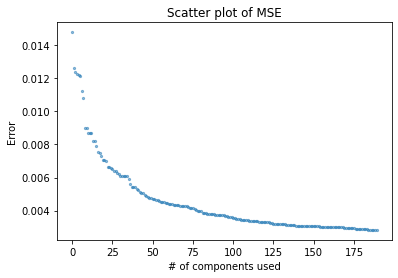

The minimum error attained: 0.002831086550763322.


In [7]:
image = np.asarray(Image.open(cImage))/255
image = np.reshape(image,VECTOR_SHAPE)
image = image - mean
e = runExp(image,eVecs,mean)
error = e[0]
reconstruction = e[1]
print('Part C results')
fig = plt.figure(4)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(np.reshape((reconstruction*255),IMAGE_SHAPE),cmap='gray')
axarr[1].imshow(np.reshape(((image+mean)*255),IMAGE_SHAPE),cmap='gray')
axarr[0].set_title('reconstruction')
axarr[1].set_title('original')
plt.show()
fig = plt.figure(5)
plt.scatter(range(190),error,s=5,alpha=.5)
plt.title('Scatter plot of MSE')
plt.xlabel('# of components used')
plt.ylabel('Error')
plt.show()
print('The minimum error attained: {}.'.format(min(error)))

### Discussion
This image was not included in our training set, but we might say it is from the same distribution, or that it lies in (or very near to) our face space.  This is because the person has the same expression and the overall image itself is very similar to those used in training.

Part D results


<Figure size 432x288 with 0 Axes>

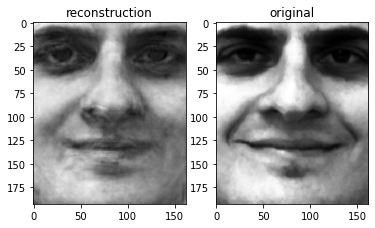

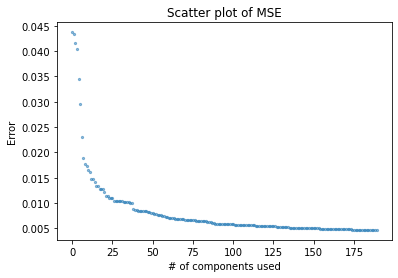

The minimum error attained: 0.004697416441534687.


In [8]:
image = np.asarray(Image.open(dImage))/255
image = np.reshape(image,VECTOR_SHAPE)
image = image - mean
e = runExp(image,eVecs,mean)
error = e[0]
reconstruction = e[1]
print('Part D results')
fig = plt.figure(6)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(np.reshape((reconstruction*255),IMAGE_SHAPE),cmap='gray')
axarr[1].imshow(np.reshape(((image+mean)*255),IMAGE_SHAPE),cmap='gray')
axarr[0].set_title('reconstruction')
axarr[1].set_title('original')
plt.show()
fig = plt.figure(7)
plt.scatter(range(190),error,s=5,alpha=.5)
plt.title('Scatter plot of MSE')
plt.xlabel('# of components used')
plt.ylabel('Error')
plt.show()
print('The minimum error attained: {}.'.format(min(error)))

### Discussion
This image has the same person as we used in part B, but he is smiling now.  This image was not used in training, nor was any image with a smiling person.  Since the error is worse than part C, we can posit that the distribution of smiling faces of the *same people* is further from our face space than is the distribution of neutral faces of other people.  In other words, variance in the person is well represented in the face space, while variance in expression is *not*.

Part E results


<Figure size 432x288 with 0 Axes>

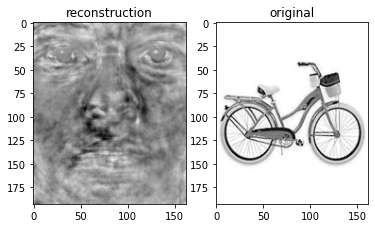

In [9]:
#pre process
image = Image.open(eImage).convert('L')
#image processing has origin at top left
image = image.resize((IMAGE_SHAPE[1],IMAGE_SHAPE[0]),Image.BICUBIC)
image = np.reshape(np.asarray(image),VECTOR_SHAPE)


image = image - mean
e = runExp(image,eVecs,mean)
error = e[0]
reconstruction = e[1]
print('Part E results')
fig = plt.figure(8)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(np.reshape((reconstruction*255),IMAGE_SHAPE),cmap='gray')
axarr[1].imshow(np.reshape(((image+mean)*255),IMAGE_SHAPE),cmap='gray')
axarr[0].set_title('reconstruction')
axarr[1].set_title('original')
plt.show()

### Discussion
Now a somewhat comical example.  The bicycle on the right looks nothing at all like the ghostly face on the left.  We can undoubtedly conclude that our face space has no ability to implicitly represent this bicycle.  And this is unsurprising.  It really doesn't make sense for a linear combination of eigen*faces* to contain much information about bicycles.

Part F results
Reconstructions given on the top, originals at the bottom


<Figure size 432x288 with 0 Axes>

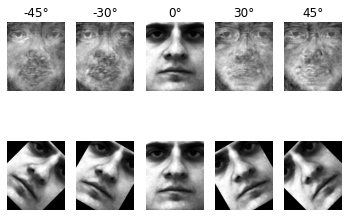

In [10]:
imageOriginal = Image.open(fImage)
fig = plt.figure(9)
f, axarr = plt.subplots(2,5)
index = 0
print('Part F results')
print('Reconstructions given on the top, originals at the bottom')
for angle in [-45, -30, 0, 30, 45]:
    image = imageOriginal
    image = image.rotate(angle)
    img = np.reshape(np.asarray(image)/255,VECTOR_SHAPE)
    img = img - mean
    reconstruction = runExp(img,eVecs,mean)[1]
    axarr[0,index].imshow(np.reshape((reconstruction*255),IMAGE_SHAPE),cmap='gray')
    axarr[1,index].imshow(image,cmap='gray')
    axarr[0,index].set_title(str(angle)+'°')
    axarr[0,index].axis('off')
    axarr[1,index].axis('off')
    index+=1
    
plt.show()


### Discussion
This example displays yet another limitation of the model.  Our eigenfaces only work when our image is oriented as the training samples.  An interesting extension would be to multiply our principle components by a rotation matrix corresponding to the rotation of the test image.  This would likely yield better results, as we can see our reconstructions display absolutely no ability to begin to reconstruct a face of a different orientation than the test data provides.